## IPO预测
分为两个数据集：ipo_data.csv 和 sp_data.csv。详细特征说明见txt文档。

In [251]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### 1.读取数据集

In [252]:
ipo_data=pd.read_csv('./ipo_data.csv',encoding='latin-1')

In [253]:
ipo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3515 entries, 0 to 3514
Data columns (total 12 columns):
Date                         3515 non-null object
Issuer                       3515 non-null object
Symbol                       3515 non-null object
Lead/Joint-Lead  Managers    3515 non-null object
Offer Price                  3515 non-null float64
Opening Price                3515 non-null float64
1st Day Close                3515 non-null float64
1st Day % Px Chng            3514 non-null float64
$ Change Opening             3515 non-null float64
$ Change Close               3515 non-null float64
Star Ratings                 3508 non-null object
Performed                    395 non-null object
dtypes: float64(6), object(6)
memory usage: 329.6+ KB


缺失值处理

In [254]:
ipo_data.isnull().sum()

Date                            0
Issuer                          0
Symbol                          0
Lead/Joint-Lead  Managers       0
Offer Price                     0
Opening Price                   0
1st Day Close                   0
1st Day % Px Chng               1
$ Change Opening                0
$ Change Close                  0
Star Ratings                    7
Performed                    3120
dtype: int64

观察上面打印信息，发现有三个特征存在缺失值。

In [255]:
# 缺失量过多故直接删除该特征
ipo_data.drop('Performed',axis=1,inplace=True)

In [256]:
# 此特征标签后面有个空格
ipo_data[ipo_data['1st Day % Px Chng '].isnull()]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings
414,2018/6/28 0:00,Entera Bio Ltd.,ENTXW,Maxim Group,0.0,0.96,0.81,NaN,0.96,0.81,N/C


In [257]:
# 只有一例，直接删除即可
ipo_data.dropna(axis=0,how='any',inplace=True)
ipo_data.reset_index(drop=True,inplace=True)

In [258]:
ipo_data['Star Ratings'].value_counts()

1      1753
3       846
2       804
4        68
N/C      26
5         8
NC        2
Name: Star Ratings, dtype: int64

In [259]:
# 对缺失值进行填充0处理
ipo_data['Star Ratings'].replace('N/C',0,inplace=True)
ipo_data['Star Ratings'].replace('NC',0,inplace=True)
ipo_data['Star Ratings'].value_counts()

1    1753
3     846
2     804
4      68
0      28
5       8
Name: Star Ratings, dtype: int64

In [260]:
ipo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507 entries, 0 to 3506
Data columns (total 11 columns):
Date                         3507 non-null object
Issuer                       3507 non-null object
Symbol                       3507 non-null object
Lead/Joint-Lead  Managers    3507 non-null object
Offer Price                  3507 non-null float64
Opening Price                3507 non-null float64
1st Day Close                3507 non-null float64
1st Day % Px Chng            3507 non-null float64
$ Change Opening             3507 non-null float64
$ Change Close               3507 non-null float64
Star Ratings                 3507 non-null object
dtypes: float64(6), object(5)
memory usage: 301.5+ KB


### 2.特征处理

Date数据类型转换

In [261]:
# 寻找不满足datatime的异常格式数据
for d in ipo_data['Date']:
    try:
        d=pd.to_datetime(d)
    except:
        print(d)

11/120


In [262]:
ipo_data[ipo_data['Date']=='11/120']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings
1641,11/120,"Alon USA Partners, LP",ALDW,"Goldman, Sachs/ Credit Suisse/ Citigroup",16.0,17.0,18.4,0.15,1.0,2.4,1


In [263]:
ipo_data.iloc[1640:1643]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings
1640,2012/11/16 0:00,Ruckus Wireless,RKUS,"Goldman, Sachs/ Morgan Stanley",15.0,15.0,12.25,-0.183333,0.0,-2.75,3
1641,11/120,"Alon USA Partners, LP",ALDW,"Goldman, Sachs/ Credit Suisse/ Citigroup",16.0,17.0,18.40,0.150000,1.0,2.40,1
1642,2012/11/21 0:00,YY Inc.,YY,Morgan Stanley/ Deutsche Bank Securities/ Citi...,10.5,10.5,11.31,0.077143,0.0,0.81,1


观察上表可以知道其date正确值为2012-11-20。

In [264]:
ipo_data.loc[1641,'Date']=pd.to_datetime('2012-11-20')

In [265]:
# 格式转换 将Date列数据转换成datetime格式数据
ipo_data['Date']=pd.to_datetime(ipo_data['Date'])

Date特征提取生成year、month、weekday特征，并全部转换成类别型。

In [266]:
ipo_data['year']=ipo_data['Date'].map(lambda x:x.year)
ipo_data['year']=ipo_data['year'].map(lambda x:str(x-min(ipo_data['year'])))

ipo_data['month']=ipo_data['Date'].map(lambda x:x.month)
ipo_data['month']=ipo_data['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',\
                                   8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

ipo_data['weekday']=ipo_data['Date'].dt.dayofweek.map({0:'Mon', 1:'Tues', 2:'Wed',\
                                                  3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})

In [267]:
ipo_data.head(5).T

,0,1,2,3,4
Date,2020-01-17 00:00:00,2020-01-17 00:00:00,2020-01-17 00:00:00,2020-01-17 00:00:00,2020-01-24 00:00:00
Issuer,I-Mab,LIZHI,Phoenix Tree Holdings Ltd.,Velocity Financial,Gores Holdings IV
Symbol,IMAB,LIZI,DNK,VEL,GHIVU
Lead/Joint-Lead Managers,Jefferies/ CICC,Credit Suisse/ Citigroup,Citigroup/ Credit Suisse/ J.P. Morgan,Wells Fargo Securities/ Citigroup/ JMP Securities,Deutsche Bank Securities
Offer Price,14,11,13.5,13,10
Opening Price,14.75,11.03,13.5,13.85,10.52
1st Day Close,12.75,11.63,13.5,13.51,10.45
1st Day % Px Chng,-0.0892857,0.0572727,0,0.0392308,0.045
$ Change Opening,0.75,0.03,0,0.85,0.52
$ Change Close,-1.25,0.63,0,0.51,0.45


根据发行价、开盘价、收盘价之间的关系检验数据的一致性

In [268]:
ipo_data[ipo_data['$ Change Opening']-(ipo_data['Opening Price']-ipo_data['Offer Price'])>=1e-4]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,year,month,weekday
2601,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.0,6.09,6.22,0.036667,6.22,0.22,1,5,Apr,Mon


In [269]:
ipo_data.loc[2601,'$ Change Opening']=ipo_data.loc[2601,'Opening Price']-ipo_data.loc[2601,'Offer Price']

In [270]:
ipo_data[ipo_data['$ Change Close']-(ipo_data['1st Day Close']-ipo_data['Offer Price'])>=1e-4]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,year,month,weekday
380,2018-05-24,Scholar Rock Holding,SRRK,Jefferies/ Cowen/ BMO Capital Markets,14.0,14.25,15.50,0.107143,0.25,15.0,1,18,May,Thurs
2102,2007-03-28,Super Micro Computer,SMCI,Merrill Lynch,8.0,8.85,8.76,0.095000,0.85,1.0,1,7,Mar,Wed
2105,2007-03-29,GSI Technology,GSIT,Needham/WRHambrecht+Co,5.5,5.50,5.29,-0.038182,0.00,1.0,1,7,Mar,Thurs
2999,2004-12-14,Cascade Microtech,CSCD,Lehman Brothers/JP Morgan,14.0,14.43,13.75,-0.017857,0.43,2.0,2,4,Dec,Tues


In [271]:
for ind in (ipo_data[ipo_data['$ Change Close']-(ipo_data['1st Day Close']-ipo_data['Offer Price'])>=1e-4]).index:
    ipo_data.loc[ind,'$ Change Close']=ipo_data.loc[ind,'1st Day Close']-ipo_data.loc[ind,'Offer Price']

In [272]:
ipo_data[ipo_data['1st Day % Px Chng ']-(ipo_data['$ Change Close']/ipo_data['Offer Price'])>=1e-7]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,year,month,weekday
134,2019-04-18,Greenlane Holdings,GNLN,Cowen/Canaccord Genuity,17.0,29.0,21.1,0.241176,12.0,2.0,2,19,Apr,Thurs


In [273]:
ipo_data.loc[134,'1st Day % Px Chng ']=ipo_data.loc[134,'$ Change Close']/ipo_data.loc[134,'Offer Price']

绘制图像，观察一下

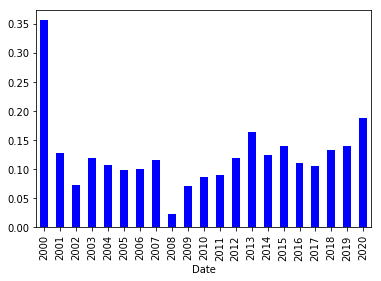

In [274]:
ipo_data.groupby(ipo_data['Date'].dt.year)['1st Day % Px Chng '].mean().plot(kind='bar',color='b')

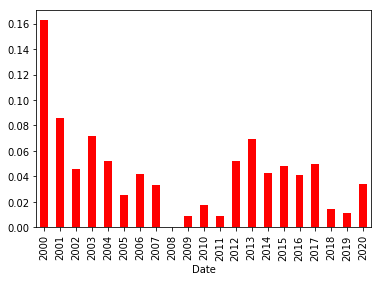

In [275]:
ipo_data.groupby(ipo_data['Date'].dt.year)['1st Day % Px Chng '].median().plot(kind='bar',color='r')

In [276]:
ipo_data['1st Day % Px Chng '].describe()

count    3507.000000
mean        0.133080
std         0.276767
min        -0.410833
25%         0.000000
50%         0.039474
75%         0.194164
max         3.538519
Name: 1st Day % Px Chng , dtype: float64

### 3.特征生成

其实很少人能够买到发行价，大部分都是买开盘价，故根据开盘价与收盘价生成两个特征。因此，大部分人的收益
就是开盘价与收盘价之间的差值。

In [277]:
ipo_data['$ Chg Open to Close'] = ipo_data['1st Day Close'] - ipo_data['Opening Price']
ipo_data['% Chg Open to Close'] = (ipo_data['$ Chg Open to Close']/ipo_data['Opening Price'])

In [278]:
ipo_data['% Chg Open to Close'].describe()

count    3507.000000
mean        0.013330
std         0.114724
min        -0.492812
25%        -0.029050
50%         0.000000
75%         0.038856
max         2.173653
Name: % Chg Open to Close, dtype: float64

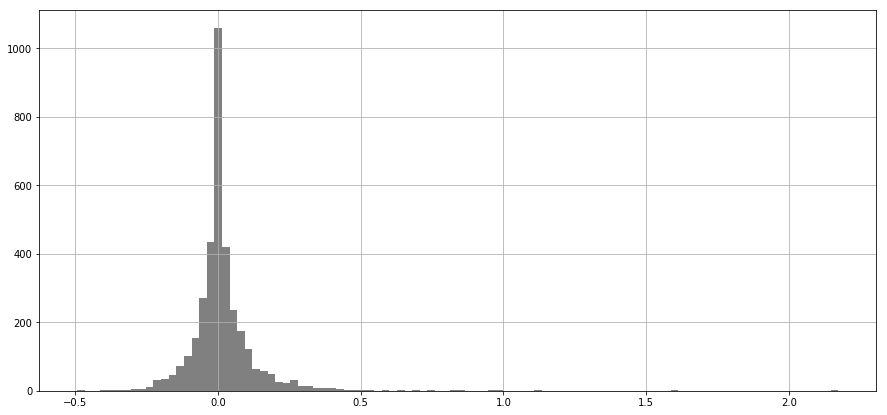

In [279]:
ipo_data['% Chg Open to Close'].hist(figsize=(15,7), bins=100, color='grey')

观察上图，分布接近于正态分布，但是在左边仍然有少数大值，顾客得到的越是向右收益则越高。

读取标普数据集，生成新特征。

In [280]:
sp_data=pd.read_csv('./sp_data.csv')

In [281]:
sp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5074 entries, 0 to 5073
Data columns (total 7 columns):
Date         5074 non-null object
Open         5074 non-null float64
High         5074 non-null float64
Low          5074 non-null float64
Close        5074 non-null float64
Adj Close    5074 non-null float64
Volume       5074 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 277.6+ KB


In [282]:
noninvalid_date=[]
def get_week_chg(ipo_dt):
    try:
        day_ago_ind=sp_data[sp_data['Date']==str(ipo_dt.date())].index[0]-1
        week_ago_ind=sp_data[sp_data['Date']==str(ipo_dt.date())].index[0]-8
        chg=(sp_data.iloc[day_ago_ind]['Close'] - \
               sp_data.iloc[week_ago_ind]['Close'])/(sp_data.iloc[week_ago_ind]['Close'])
        return chg
    except:
        noninvalid_date.append(ipo_dt)
        print(ipo_dt)
        
# 标普500昨日收盘价相对于其七天前收盘价的变化百分比
ipo_data['SP Week Change'] = ipo_data['Date'].map(get_week_chg)

2019-02-24 00:00:00
2015-02-21 00:00:00
2015-02-21 00:00:00
2013-11-16 00:00:00
2009-08-01 00:00:00


In [283]:
ipo_data.drop(ipo_data[ipo_data['Date'].isin(noninvalid_date)].index,axis=0,inplace=True)
ipo_data.reset_index(drop=True,inplace=True)

In [284]:
def get_cto_chg(ipo_dt):
    try:
        today_open_ind=sp_data[sp_data['Date']==str(ipo_dt.date())].index[0]
        ago_close_ind=sp_data[sp_data['Date']==str(ipo_dt.date())].index[0]-1
        chg=(sp_data.iloc[today_open_ind]['Open'] - \
               sp_data.iloc[ago_close_ind]['Close'])/(sp_data.iloc[ago_close_ind]['Close'])
        return chg
    except:
        print(ipo_dt)
        
# 标准普尔500指数在IPO前一天收盘时到IPO首日开盘时这个期间内，变化的百分比
ipo_data['SP Close to Open Chg Pct'] = ipo_data['Date'].map(get_cto_chg)

In [285]:
ipo_data.head(5).T

,0,1,2,3,4
Date,2020-01-17 00:00:00,2020-01-17 00:00:00,2020-01-17 00:00:00,2020-01-17 00:00:00,2020-01-24 00:00:00
Issuer,I-Mab,LIZHI,Phoenix Tree Holdings Ltd.,Velocity Financial,Gores Holdings IV
Symbol,IMAB,LIZI,DNK,VEL,GHIVU
Lead/Joint-Lead Managers,Jefferies/ CICC,Credit Suisse/ Citigroup,Citigroup/ Credit Suisse/ J.P. Morgan,Wells Fargo Securities/ Citigroup/ JMP Securities,Deutsche Bank Securities
Offer Price,14,11,13.5,13,10
Opening Price,14.75,11.03,13.5,13.85,10.52
1st Day Close,12.75,11.63,13.5,13.51,10.45
1st Day % Px Chng,-0.0892857,0.0572727,0,0.0392308,0.045
$ Change Opening,0.75,0.03,0,0.85,0.52
$ Change Close,-1.25,0.63,0,0.51,0.45


承销商和代码其实是相互对应的，这里通过承销商特征得到主承销商和承销商数目。后面会将代码删除。

In [286]:
ipo_data['Lead Mangager']=ipo_data['Lead/Joint-Lead  Managers'].map(lambda x:x.split('/')[0].strip())
ipo_data['Mangagers number']=ipo_data['Lead/Joint-Lead  Managers'].map(lambda x:len(x.split('/')))

In [287]:
for n in pd.DataFrame(ipo_data['Lead Mangager'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(n)

A.G. Edwards
A.G. Edwards & Sons
A.G. Edwrads & Sons
AG Edwards
AG Edwards & Sons
AG Edwrads
AMTD
AMTD Global Markets
Adams Harkness
Advest
Aegis Capital
Aegis Capital Corp
Aegis Capital Corp.
Alexander Capital
Anderson & Strudrick
Axiom
Axiom Capital Management
B. Riley FBR
BB&T Capital Markets
BBVA
BMN Nesbitt Burns
BMO Capital Markets
BTIG
Baird
Baird, BMO Capital Markets, Janney Montgomery Scott
Banc of America
Banc of America Securities
Barclay Capital
Barclays
Barclays Capital
Bear Stearns
Bear Streans
Bear, Stearns
Benchmark
Benchmark Company
BoA Merrill Lynch
BofA
BofA Merril Lynch
BofA Merrill Lych
BofA Merrill Lync
BofA Merrill Lynch
BofA Securities
Boustead Securities
Broadband Capital Management
Broadband Capital Management LLC
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CE Unterberg Towbin
CIBC Capital Markets
CIBC World Markets
CIBC Worldwide
CICC
CRT Capital
CRT Capital Group
CS First Boston
CSFB
CSFirst Boston
Canaccord Genuity
Cantor
Cantor Fitzgerald
Cantor Fitzger

In [288]:
# 会有重复的承销商名（有时会有拆分空格之类的），故进行合并
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('AMTD'),'Lead Mangager'] = 'AMTD Global Markets'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Axiom'),'Lead Mangager'] = 'Axiom Capital Management'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Hambrecht'),'Lead Mangager'] = 'WR Hambrecht+Co.'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Benchmark'),'Lead Mangager'] = 'Benchmark'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('BofA Merrill'),'Lead Mangager'] = 'BofA Merrill Lync'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Chardan'),'Lead Mangager'] = 'Chardan'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Craig-Hallum Capital'),'Lead Mangager'] = 'Craig-Hallum Capital'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Donaldson'),'Lead Mangager'] = 'Donaldson Lufkin & Jenrette'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('P Morgan'),'Lead Mangager'] = 'JP Morgan'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('MDB Capital Group'),'Lead Mangager'] = 'MDB Capital Group LLC'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Hambr'),'Lead Mangager'] = 'W.R. Hambracht'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Thomas Weisel'),'Lead Mangager'] = 'Thomas Weisel'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('ThinkEquity'),'Lead Mangager'] = 'ThinkEquity'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Merrill Lynch'),'Lead Mangager'] = 'Merrill Lynch'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('National Securities'),'Lead Mangager'] = 'National Securities'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Needham'),'Lead Mangager'] = 'Needham'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Northland Capital'),'Lead Mangager'] = 'Northland Capital'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('on Stephens'),'Lead Mangager'] = 'Roberston Stephens'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Edwards'), 'Lead Mangager'] = 'AG Edwards'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Edwrads'), 'Lead Mangager'] = 'AG Edwards'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Barclay'), 'Lead Mangager'] = 'Barclays'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Aegis'), 'Lead Mangager'] = 'Aegis Capital'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Deutsche'), 'Lead Mangager'] = 'Deutsche Bank'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Suisse'), 'Lead Mangager'] = 'CSFB'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('CS.?F'), 'Lead Mangager'] = 'CSFB'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('^Early'), 'Lead Mangager'] = 'EarlyBirdCapital'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Keefe'), 'Lead Mangager'] = 'Keefe, Bruyette & Woods'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Stan'), 'Lead Mangager'] = 'Morgan Stanley'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('P. Morg'), 'Lead Mangager'] = 'JP Morgan'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('PM'), 'Lead Mangager'] = 'JP Morgan'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('J\.P\.'), 'Lead Mangager'] = 'JP Morgan'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Banc of'), 'Lead Mangager'] = 'Banc of America'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Lych'), 'Lead Mangager'] = 'BofA Merrill Lynch'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Merrill$'), 'Lead Mangager'] = 'Merrill Lynch'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Lymch'), 'Lead Mangager'] = 'Merrill Lynch'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('A Merril Lynch'), 'Lead Mangager'] = 'BofA Merrill Lynch'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Merril '), 'Lead Mangager'] = 'Merrill Lynch'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('BofA$'), 'Lead Mangager'] = 'BofA Merrill Lynch'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('SANDLER'), 'Lead Mangager'] = 'Sandler O\'neil + Partners'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Sandler'), 'Lead Mangager'] = 'Sandler O\'Neil + Partners'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Renshaw'), 'Lead Mangager'] = 'Rodman & Renshaw'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Baird'), 'Lead Mangager'] = 'RW Baird'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Cantor'), 'Lead Mangager'] = 'Cantor Fitzgerald'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Goldman'), 'Lead Mangager'] = 'Goldman Sachs'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Bear'), 'Lead Mangager'] = 'Bear Stearns'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('BoA'), 'Lead Mangager'] = 'BofA Merrill Lynch'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Broadband'), 'Lead Mangager'] = 'Broadband Capital'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Davidson'), 'Lead Mangager'] = 'DA Davidson'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Feltl'), 'Lead Mangager'] = 'Feltl & Co.'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('China'), 'Lead Mangager'] = 'China International'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Cit'), 'Lead Mangager'] = 'Citigroup'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Ferris'), 'Lead Mangager'] = 'Ferris Baker Watts'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Friedman|Freidman|FBR'), 'Lead Mangager'] = 'Friedman Billings Ramsey'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('^I-'), 'Lead Mangager'] = 'I-Bankers'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Gunn'), 'Lead Mangager'] = 'Gunn Allen'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Jeffer'), 'Lead Mangager'] = 'Jefferies'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Oppen'), 'Lead Mangager'] = 'Oppenheimer'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('JMP'), 'Lead Mangager'] = 'JMP Securities'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Rice'), 'Lead Mangager'] = 'Johnson Rice'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Ladenburg'), 'Lead Mangager'] = 'Ladenburg Thalmann'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Piper'), 'Lead Mangager'] = 'Piper Jaffray'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Pali'), 'Lead Mangager'] = 'Pali Capital'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Paulson'), 'Lead Mangager'] = 'Paulson Investment Co.'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Roth'), 'Lead Mangager'] = 'Roth Capital'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Stifel'), 'Lead Mangager'] = 'Stifel Nicolaus'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('SunTrust'), 'Lead Mangager'] = 'SunTrust Robinson'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Wachovia'), 'Lead Mangager'] = 'Wachovia'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Wedbush'), 'Lead Mangager'] = 'Wedbush Morgan'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Blair'), 'Lead Mangager'] = 'William Blair'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Wunderlich'), 'Lead Mangager'] = 'Wunderlich'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Max'), 'Lead Mangager'] = 'Maxim Group'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('CIBC'), 'Lead Mangager'] = 'CIBC'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('CRT'), 'Lead Mangager'] = 'CRT Capital'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('HCF'),'Lead Mangager'] = 'HCFP Brenner'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Cohen'), 'Lead Mangager']  = 'Cohen & Co.'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Cowen'), 'Lead Mangager'] = 'Cowen & Co.'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Leerink'), 'Lead Mangager']  = 'Leerink Partners'
ipo_data.loc[ipo_data['Lead Mangager'].str.contains('Lynch\xca'), 'Lead Mangager'] = 'Merrill Lynch'

发行价与开盘价之间的百分比变化

In [289]:
ipo_data['% offer to open chg']=ipo_data['$ Change Opening']/ipo_data['Opening Price']

In [290]:
ipo_data.columns

Index(['Date', 'Issuer', 'Symbol', 'Lead/Joint-Lead  Managers', 'Offer Price',
       'Opening Price', '1st Day Close', '1st Day % Px Chng ',
       '$ Change Opening', '$ Change Close', 'Star Ratings', 'year', 'month',
       'weekday', '$ Chg Open to Close', '% Chg Open to Close',
       'SP Week Change', 'SP Close to Open Chg Pct', 'Lead Mangager',
       'Mangagers number', '% offer to open chg'],
      dtype='object')

### 4.模型训练

此处是二分类问题，根据'$ Chg Open to Close'设置一定的阈值将其分为0,1标签，用户会购买预测为1的股。我们不会预估收盘价，只会预测是否进行
购股的行为。

In [291]:
# 此处选出一些特征，不能与收盘价有关，且特征不能重复
train_features=['Offer Price','Opening Price', '$ Change Opening', 'Star Ratings', 'year', 'month',
       'weekday', 'SP Week Change', 'SP Close to Open Chg Pct', 'Lead Mangager','Mangagers number', 
        '% offer to open chg']
train_ipo=ipo_data[train_features]
train_ipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3502 entries, 0 to 3501
Data columns (total 12 columns):
Offer Price                 3502 non-null float64
Opening Price               3502 non-null float64
$ Change Opening            3502 non-null float64
Star Ratings                3502 non-null object
year                        3502 non-null object
month                       3502 non-null object
weekday                     3502 non-null object
SP Week Change              3502 non-null float64
SP Close to Open Chg Pct    3502 non-null float64
Lead Mangager               3502 non-null object
Mangagers number            3502 non-null int64
% offer to open chg         3502 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 328.4+ KB


In [292]:
cat_features=['Star Ratings', 'year', 'month','weekday', 'Lead Mangager']
train_ipo=pd.get_dummies(train_ipo)

In [325]:
year_thresh=19 #设置年份划分数据集 0-20
chg_thresh=0.2 
# 这是'$ Chg Open to Close'的阈值，大于0，预测大于0的股，能够得到更高收益

train_before_data=train_ipo[ipo_data['year'].astype(int)<year_thresh]
test_data=train_ipo[ipo_data['year'].astype(int)>=year_thresh]
print(len(train_before_data))
print(len(test_data))

3197
305


In [326]:
train_target=ipo_data[ipo_data['year'].astype(int)<year_thresh]['$ Chg Open to Close'].map(lambda x:1 if x>chg_thresh else 0)
test_target=ipo_data[ipo_data['year'].astype(int)>=year_thresh]['$ Chg Open to Close'].map(lambda x:1 if x>chg_thresh else 0)
print(len(train_target))
print(len(test_target))

3197
305


In [327]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression() #逻辑回归模型
clf.fit(train_before_data,train_target)
score=clf.score(test_data,test_target)
score

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6885245901639344

其实只有少数会有所收益，如果模型全部预测为0，其准确率也不会低的。样本的不平衡其实影响很大。

### 5.结果分析

In [328]:
pred_label=clf.predict(test_data)
results=[]
for idx,chg,true,pred in zip(test_target.index,ipo_data.loc[test_target.index,'$ Chg Open to Close'],test_target,pred_label):
    if true==pred:
        results.append([idx,chg,true,pred,1])
    else:
        results.append([idx,chg,true,pred,0])
rf=pd.DataFrame(results,columns=['index','$ Chg Open to Close','true','pred','correct'])
rf.head()

,index,$ Chg Open to Close,true,pred,correct
0,0,-2.00,0,0,1
1,1,0.60,1,0,0
2,2,0.00,0,0,1
3,3,-0.34,0,0,1
4,4,-0.07,0,0,1


In [329]:
# 此处为全部买进得到的收益的统计信息
rf['$ Chg Open to Close'].describe()

count    305.000000
mean       0.256469
std        2.775023
min       -8.950000
25%       -0.430000
50%        0.000000
75%        0.560000
max       19.750000
Name: $ Chg Open to Close, dtype: float64

In [330]:
# 此处为买进预测为1的得到的收益的统计信息
rf[rf['pred']==1]['$ Chg Open to Close'].describe()

count    67.000000
mean      0.326119
std       4.401792
min      -8.950000
25%      -1.645000
50%       0.110000
75%       1.770000
max      19.750000
Name: $ Chg Open to Close, dtype: float64

对比上面两个打印信息，可以发现预测为1的买进的股较少，且收益均值高于全部买进。但此结果有时会低于。

### 6.特征重要性

In [299]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(n_estimators=100)
clf_rf.fit(train_before_data,train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

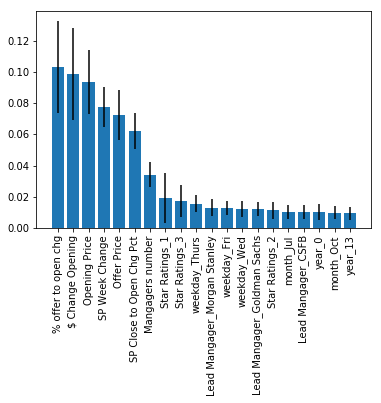

In [300]:
f_importances = clf_rf.feature_importances_
f_names = train_before_data
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

fs=zip(f_importances,f_names,f_std)
fs=sorted(fs,key=lambda x:x[0],reverse=True)
imp=[i[0] for i in fs[:20]]
nam=[i[1] for i in fs[:20]]
std=[i[2] for i in fs[:20]]

plt.bar(range(20),imp,yerr=std)
plt.xticks(range(20),nam,rotation=90)
plt.show()